# Análise exploratória dos dados da CETESB

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import imgkit

## Geral

In [2]:
data_cetesb = {}
for file_name in os.listdir('./data/cetesb/'):
    estacao = '-'.join(file_name.split('-')[:-1])
    data_cetesb[estacao] = pd.read_csv('./data/cetesb/'+file_name)
    data_cetesb[estacao]['Data'] = pd.to_datetime(data_cetesb[estacao]['Data'], infer_datetime_format=True)
    # As entradas de 00:00 do mes 10 tao como mes 11, tem que arrumar
    date_data = data_cetesb[estacao]['Data'].copy()
    for index, value in data_cetesb[estacao]['Data'].iteritems():
        if (value.month == 11) and (value.hour == 0) and (date_data[index+1].month == 10):
            date_data[index] -= pd.DateOffset(months=1)
    data_cetesb[estacao]['Data'] = date_data

In [3]:
dados_totais = pd.DataFrame()
for estacao in data_cetesb:
    estData = data_cetesb[estacao].copy()
    estData["Estação"] = estacao
    dados_totais = dados_totais.append(estData)
dados_totais.to_csv('./data/totalCETESB.csv', index=False)

In [4]:
data2019 = dados_totais.loc[dados_totais.Data.dt.year == 2019]
data2020 = dados_totais.loc[dados_totais.Data.dt.year == 2020]
data2020['Data'] = data2020['Data'] - pd.DateOffset(years=1)

/home/joao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

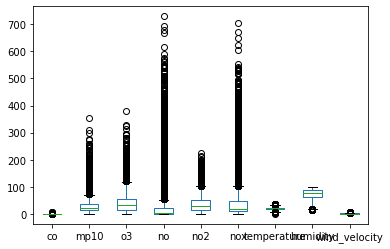

In [5]:
data2019.plot.box()

In [6]:
data2019Dia = data2019.groupby(data2019.Data.dt.date).mean()
data2020Dia = data2020.groupby(data2020.Data.dt.date).mean()
data2020Dia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 2019-01-01 to 2019-10-14
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   co             287 non-null    float64
 1   mp10           287 non-null    float64
 2   o3             287 non-null    float64
 3   no             287 non-null    float64
 4   no2            287 non-null    float64
 5   nox            287 non-null    float64
 6   temperature    287 non-null    float64
 7   humidity       287 non-null    float64
 8   wind_velocity  287 non-null    float64
dtypes: float64(9)
memory usage: 22.4+ KB


In [7]:
data2019Mes = data2019.groupby(data2019.Data.dt.month).mean()
data2020Mes = data2020.groupby(data2020.Data.dt.month).mean()

In [8]:
offset = pd.DataFrame(index=data2020Dia.index, columns=data2020Dia.columns[0:6])
offset = (data2020Dia[data2020Dia.columns[0:6]] - data2019Dia[data2019Dia.columns[0:6]])/data2019Dia[data2019Dia.columns[0:6]]
offset.index = pd.to_datetime(offset.index)
offset.index = offset.index + pd.DateOffset(years=1)
offset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2020-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co      287 non-null    float64
 1   mp10    287 non-null    float64
 2   o3      287 non-null    float64
 3   no      287 non-null    float64
 4   no2     287 non-null    float64
 5   nox     287 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [9]:
offsetMes = pd.DataFrame(index=data2020Mes.index, columns=data2020Mes.columns[0:6])
offsetMes = (data2020Mes[data2020Mes.columns[0:6]] - data2019Mes[data2019Mes.columns[0:6]])/data2019Mes[data2019Mes.columns[0:6]]
offset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2020-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co      287 non-null    float64
 1   mp10    287 non-null    float64
 2   o3      287 non-null    float64
 3   no      287 non-null    float64
 4   no2     287 non-null    float64
 5   nox     287 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


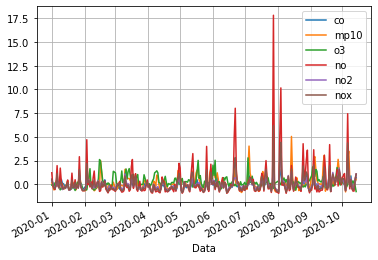

In [10]:
offset.plot(grid=True).get_figure().savefig('output/offsetDia.png')

<AxesSubplot:xlabel='Data'>

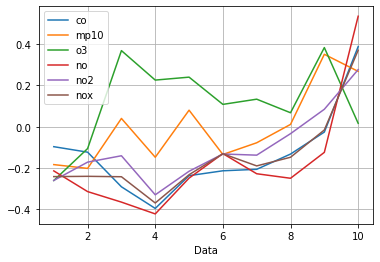

In [11]:
offsetMes.plot(grid=True)

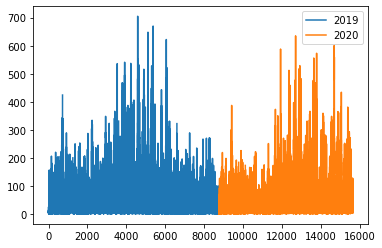

In [12]:
plt.figure()
plt.plot(data2019.index,data2019['nox'], label='2019')
plt.plot(data2020.index,data2020['nox'], label='2020')
plt.legend()

In [13]:
dados_totais.head()

Data   co   mp10    o3             Estação  no  no2  nox  \
0 2019-01-01 01:00:00  0.4  112.0  47.0  Grajaú-Parelheiros NaN  NaN  NaN   
1 2019-01-01 02:00:00  0.3   70.0  47.0  Grajaú-Parelheiros NaN  NaN  NaN   
2 2019-01-01 03:00:00  0.3   42.0  44.0  Grajaú-Parelheiros NaN  NaN  NaN   
3 2019-01-01 04:00:00  0.3   25.0  41.0  Grajaú-Parelheiros NaN  NaN  NaN   
4 2019-01-01 05:00:00  NaN   27.0  31.0  Grajaú-Parelheiros NaN  NaN  NaN   

   temperature  humidity  wind_velocity  
0          NaN       NaN            NaN  
1          NaN       NaN            NaN  
2          NaN       NaN            NaN  
3          NaN       NaN            NaN  
4          NaN       NaN            NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124002 entries, 8759 to 15647
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Data           124002 non-null  datetime64[ns]
 1   co             50004 non-null   float64       
 2   mp10           72173 non-null   float64       
 3   o3             90840 non-null   float64       
 4   Estação        124002 non-null  object        
 5   no             48985 non-null   float64       
 6   no2            48950 non-null   float64       
 7   nox            48986 non-null   float64       
 8   temperature    31821 non-null   float64       
 9   humidity       30134 non-null   float64       
 10  wind_velocity  53133 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 11.4+ MB


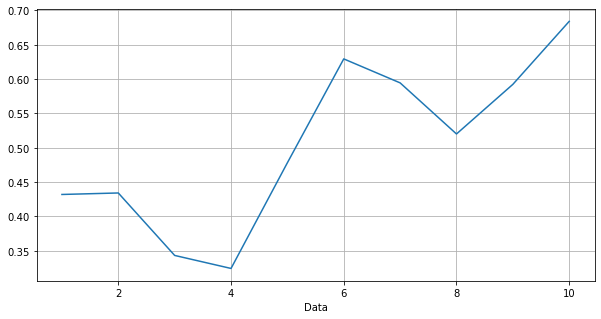

In [14]:
meanDados = dados_totais[dados_totais['Data'].dt.year == 2020]
meanDadosDia = meanDados.groupby(meanDados['Data'].dt.date).mean()
meanDadosMes = meanDados.groupby(meanDados['Data'].dt.month).mean()
meanDadosMes['co'].plot(figsize=(10,5), grid=True).get_figure().savefig('output/cetesbCoMes.png')
meanDados.info()

<AxesSubplot:xlabel='Data'>

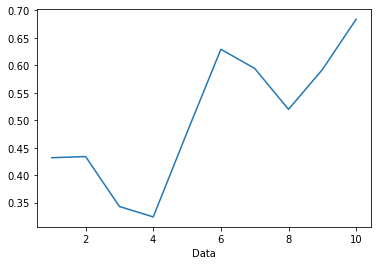

In [15]:
meanDadosMes['co'].plot()

In [16]:
imgkit.from_string(meanDadosDia[meanDadosDia.columns[0:6]].corr().style.background_gradient(cmap='RdBu').render(), 'output/corrPar.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [17]:
meanDados[meanDados.columns[0:6]].corr().style.background_gradient(cmap='RdBu')

In [18]:
google = pd.read_csv("./data/Clean_Google.csv")
google.set_index("Date", inplace=True)
google.index = pd.to_datetime(google.index)
google.head()

Retail and Recreation  Grocery and Pharmacy  Parks  Transit  \
Date                                                                      
2020-02-15                   13.0                  10.0   40.0     18.0   
2020-02-16                    7.0                   8.0   43.0     13.0   
2020-02-17                   -1.0                   1.0    0.0     11.0   
2020-02-18                   -1.0                  -2.0   -1.0     11.0   
2020-02-19                   -2.0                   0.0    3.0     11.0   

            Workplaces  Residential  
Date                                 
2020-02-15         7.0         -2.0  
2020-02-16         0.0          0.0  
2020-02-17        15.0         -2.0  
2020-02-18        14.0         -2.0  
2020-02-19        13.0         -2.0

In [19]:
data_apple = pd.read_csv('./data/2020-11-01_SP_DATA_APPLE_CLEAN')
data_apple = data_apple[['Data','Região','Dirigindo','Andando','Transito','Média']]
data_apple = data_apple[data_apple['Região'] == 'São Paulo']

# converte coluna data para o tipo datetime
data_apple['Data'] = pd.to_datetime(data_apple['Data'])
data_apple.set_index("Data", inplace=True)

In [20]:
correlacao = google.join(data_apple, how='inner')
correlacao.head()

Retail and Recreation  Grocery and Pharmacy  Parks  Transit  \
2020-02-16                    7.0                   8.0   43.0     13.0   
2020-02-17                   -1.0                   1.0    0.0     11.0   
2020-02-18                   -1.0                  -2.0   -1.0     11.0   
2020-02-19                   -2.0                   0.0    3.0     11.0   
2020-02-20                    4.0                  13.0    6.0     13.0   

            Workplaces  Residential     Região  Dirigindo  Andando  Transito  \
2020-02-16         0.0          0.0  São Paulo     118.19   150.11     98.81   
2020-02-17        15.0         -2.0  São Paulo     114.65   120.87    126.55   
2020-02-18        14.0         -2.0  São Paulo     122.00   127.86    132.14   
2020-02-19        13.0         -2.0  São Paulo     122.99   123.85    128.98   
2020-02-20        14.0         -3.0  São Paulo     118.69   116.63    117.02   

                 Média  
2020-02-16  122.370000  
2020-02-17  120.690000  
2020-02-18  127.333333  
2020-02-19  125.273333  
2020-02-20  117.446667

In [21]:
offset

co      mp10        o3        no       no2       nox
Data                                                                  
2020-01-01  0.554284  0.182805 -0.079924  1.216216  0.366362  0.494627
2020-01-02  0.058486 -0.239389 -0.079297 -0.148879  0.135651 -0.001709
2020-01-03 -0.340278 -0.588124 -0.340445 -0.401343 -0.323901 -0.356967
2020-01-04 -0.370166 -0.283910  0.155526 -0.554070 -0.357298 -0.453005
2020-01-05 -0.197168  0.308645  0.148749  0.009887 -0.062791 -0.032678
...              ...       ...       ...       ...       ...       ...
2020-12-27       NaN       NaN       NaN       NaN       NaN       NaN
2020-12-28       NaN       NaN       NaN       NaN       NaN       NaN
2020-12-29       NaN       NaN       NaN       NaN       NaN       NaN
2020-12-30       NaN       NaN       NaN       NaN       NaN       NaN
2020-12-31       NaN       NaN       NaN       NaN       NaN       NaN

[365 rows x 6 columns]

In [22]:
correlacao = correlacao.join(offset, how='inner')
correlacao.head()

Retail and Recreation  Grocery and Pharmacy  Parks  Transit  \
2020-02-16                    7.0                   8.0   43.0     13.0   
2020-02-17                   -1.0                   1.0    0.0     11.0   
2020-02-18                   -1.0                  -2.0   -1.0     11.0   
2020-02-19                   -2.0                   0.0    3.0     11.0   
2020-02-20                    4.0                  13.0    6.0     13.0   

            Workplaces  Residential     Região  Dirigindo  Andando  Transito  \
2020-02-16         0.0          0.0  São Paulo     118.19   150.11     98.81   
2020-02-17        15.0         -2.0  São Paulo     114.65   120.87    126.55   
2020-02-18        14.0         -2.0  São Paulo     122.00   127.86    132.14   
2020-02-19        13.0         -2.0  São Paulo     122.99   123.85    128.98   
2020-02-20        14.0         -3.0  São Paulo     118.69   116.63    117.02   

                 Média        co      mp10        o3        no       no2  \
2020-02-16  122.370000  0.034469  2.509901  2.378753 -0.666209 -0.116469   
2020-02-17  120.690000  0.071798  1.192235  1.334642  0.169713  0.304364   
2020-02-18  127.333333 -0.072856 -0.087921  0.385762 -0.298026 -0.064892   
2020-02-19  125.273333  0.275928 -0.087835  0.076147 -0.087265  0.055975   
2020-02-20  117.446667  0.472919  0.111611 -0.168887  0.349065  0.141666   

                 nox  
2020-02-16 -0.432422  
2020-02-17  0.241717  
2020-02-18 -0.192491  
2020-02-19 -0.015258  
2020-02-20  0.244583

In [23]:
correlacao.corr().style.background_gradient(cmap='RdBu')

In [24]:
offsetMes

co      mp10        o3        no       no2       nox
Data                                                            
1    -0.096616 -0.183434 -0.260593 -0.213925 -0.260262 -0.241643
2    -0.123227 -0.201873 -0.105708 -0.314248 -0.171495 -0.240237
3    -0.290989  0.040239  0.368907 -0.365210 -0.140585 -0.242255
4    -0.395836 -0.147876  0.226139 -0.422417 -0.329818 -0.369453
5    -0.237031  0.080286  0.240353 -0.248917 -0.215686 -0.232429
6    -0.213426 -0.134342  0.108417 -0.130187 -0.132037 -0.130869
7    -0.206318 -0.077671  0.133571 -0.227749 -0.137668 -0.189774
8    -0.132338  0.011353  0.067800 -0.249660 -0.033535 -0.147886
9    -0.025779  0.351133  0.383568 -0.124106  0.084708 -0.015656
10    0.388120  0.268320  0.016784  0.535495  0.276843  0.370602
11         NaN       NaN       NaN       NaN       NaN       NaN
12         NaN       NaN       NaN       NaN       NaN       NaN

In [25]:
googleMes = google.groupby(google.index.month).mean()

In [26]:
appleMes = data_apple.groupby(data_apple.index.month).mean()

In [27]:
correlacaoMes = googleMes.join(appleMes, how='inner')
correlacaoMes

Retail and Recreation  Grocery and Pharmacy      Parks    Transit  \
2               -4.066667              1.866667   9.800000   0.600000   
3              -30.000000             -2.322581 -22.806452 -22.096774   
4              -68.333333            -17.300000 -54.566667 -59.133333   
5              -65.064516            -12.451613 -52.258065 -54.967742   
6              -55.200000             -5.233333 -43.866667 -47.066667   
7              -42.870968              4.516129 -30.161290 -38.451613   
8              -36.612903              7.225806 -26.225806 -33.677419   
9              -33.800000              8.366667 -21.766667 -29.500000   
10             -31.777778             11.777778 -25.222222 -21.222222   

    Workplaces  Residential   Dirigindo     Andando    Transito       Média  
2    -2.066667     1.600000  111.498214  112.240357  104.488214  109.408929  
3   -14.741935     9.419355   71.343226   68.545806   64.009032   67.966022  
4   -49.666667    22.500000   38.324667   24.735000   18.957333   27.339000  
5   -41.741935    21.000000   46.216552   27.873793   20.536897   31.542414  
6   -32.333333    18.300000   60.390667   37.730000   29.353000   42.491222  
7   -26.096774    15.258065   76.464516   50.914839   39.910000   55.763118  
8   -21.064516    13.096774   84.505484   57.604516   47.372258   63.160753  
9   -20.300000    11.633333   95.361000   68.561333   56.943667   73.622000  
10  -16.000000    10.296296   95.222857   72.441429   61.036429   76.233571

In [28]:
correlacaoMes = correlacaoMes.join(offsetMes, how='inner')
correlacaoMes

Retail and Recreation  Grocery and Pharmacy      Parks    Transit  \
2               -4.066667              1.866667   9.800000   0.600000   
3              -30.000000             -2.322581 -22.806452 -22.096774   
4              -68.333333            -17.300000 -54.566667 -59.133333   
5              -65.064516            -12.451613 -52.258065 -54.967742   
6              -55.200000             -5.233333 -43.866667 -47.066667   
7              -42.870968              4.516129 -30.161290 -38.451613   
8              -36.612903              7.225806 -26.225806 -33.677419   
9              -33.800000              8.366667 -21.766667 -29.500000   
10             -31.777778             11.777778 -25.222222 -21.222222   

    Workplaces  Residential   Dirigindo     Andando    Transito       Média  \
2    -2.066667     1.600000  111.498214  112.240357  104.488214  109.408929   
3   -14.741935     9.419355   71.343226   68.545806   64.009032   67.966022   
4   -49.666667    22.500000   38.324667   24.735000   18.957333   27.339000   
5   -41.741935    21.000000   46.216552   27.873793   20.536897   31.542414   
6   -32.333333    18.300000   60.390667   37.730000   29.353000   42.491222   
7   -26.096774    15.258065   76.464516   50.914839   39.910000   55.763118   
8   -21.064516    13.096774   84.505484   57.604516   47.372258   63.160753   
9   -20.300000    11.633333   95.361000   68.561333   56.943667   73.622000   
10  -16.000000    10.296296   95.222857   72.441429   61.036429   76.233571   

          co      mp10        o3        no       no2       nox  
2  -0.123227 -0.201873 -0.105708 -0.314248 -0.171495 -0.240237  
3  -0.290989  0.040239  0.368907 -0.365210 -0.140585 -0.242255  
4  -0.395836 -0.147876  0.226139 -0.422417 -0.329818 -0.369453  
5  -0.237031  0.080286  0.240353 -0.248917 -0.215686 -0.232429  
6  -0.213426 -0.134342  0.108417 -0.130187 -0.132037 -0.130869  
7  -0.206318 -0.077671  0.133571 -0.227749 -0.137668 -0.189774  
8  -0.132338  0.011353  0.067800 -0.249660 -0.033535 -0.147886  
9  -0.025779  0.351133  0.383568 -0.124106  0.084708 -0.015656  
10  0.388120  0.268320  0.016784  0.535495  0.276843  0.370602

In [29]:
correlacaoMes.corr().style.background_gradient(cmap='RdBu')